In [58]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
root=os.path.abspath("../..")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\14253\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
df=pd.read_excel(root+"\\data\\messages\\dataset.xlsx")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [60]:
# 创建VADER情感分析器
sia = SentimentIntensityAnalyzer()
result=[]

# 分析情感极性
for chat in df['text']:
    chat = chat.lower()
    chat = re.sub(r'[^a-z\s]', '', chat)
    # 使用TextBlob分析情感
    blob = TextBlob(chat)
    blob_polarity = blob.sentiment.polarity
    blob_subjectivity = blob.sentiment.subjectivity

    # 使用VADER分析情感
    sia_scores = sia.polarity_scores(chat)
    sia_compound = sia_scores['compound']
    result.append({'文本':chat,'TextBlob极性':blob_polarity,'TextBlob主观性':blob_subjectivity,'VADER综合得分': sia_compound})

df_result = pd.DataFrame(result)
df_result=df_result[(df_result['VADER综合得分']<0) & (df_result['TextBlob极性']<0)]
df_result.head()


,文本,TextBlob极性,TextBlob主观性,VADER综合得分
1,trouble sleeping confused mind restless heart ...,-0.3000,0.4500,-0.7269
2,all wrong back off dear forward doubt stay in ...,-0.2500,0.4500,-0.7351
4,im restless and restless its been a month now ...,-0.3125,0.6875,-0.4939
5,every break you must be nervous like something...,-0.5000,0.9000,-0.2144
6,i feel scared anxious what can i do and may my...,-0.2500,1.0000,-0.2500


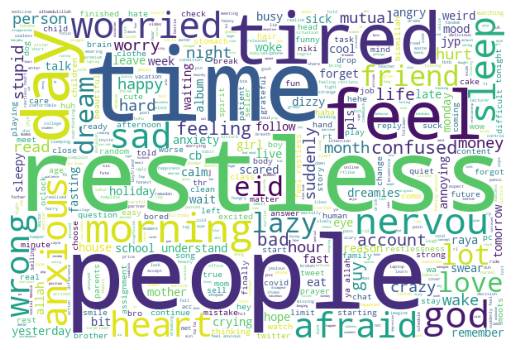

In [61]:
with open(root+'\\data\\messages\\messages.txt', 'a') as file:
    for text in df_result['文本']:
       file.write(text + '\n')
text = open(root+'\\data\\messages\\messages.txt', 'r', encoding='utf-8').read()
stopwords = open(root+'\\data\\messages\\stopwords.txt', 'r', encoding='utf-8').read().split('\n')

text = text.lower()
text = re.sub(r'[^a-z\s]', '', text)
wc = WordCloud(width=600, 
               height=400, 
               background_color="white", 
               max_words=1000, 
               stopwords=stopwords)

wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()      
wc.to_file(root+'\\result\\wordcloud.png')